**MLP for Binary Classification**


In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

## Load data
Pima Indian Diabetes 2 data set obtained from the UCI Repository of machine learning databases (Newman et al. 1998)\
Attributes:

* pregnant: Number of times pregnant
* glucose: Plasma glucose concentration (glucose tolerance test)
* pressure: Diastolic blood pressure (mm Hg)
* triceps: Triceps skin fold thickness (mm)
* insulin: 2-Hour serum insulin (mu U/ml)
* mass: Body mass index (weight in kg/(height in m)\²)
* pedigree: Diabetes pedigree function
* age: Age (years)
* diabetes: diabetes case (0 = neg / 1 = pos)

In [40]:
rawdata = pd.read_csv("your downloaded dataset location, e.g. c:/users/.../diabetes2.csv")
print(f"Number of rows: {rawdata.shape[0]} and columns: {rawdata.shape[1]}")
rawdata.head()

Number of rows: 392 and columns: 9


,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1


## Frequency distribution of categorical column

[Resampling strategies for imbalanced datasets](https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook)

<BarContainer object of 2 artists>

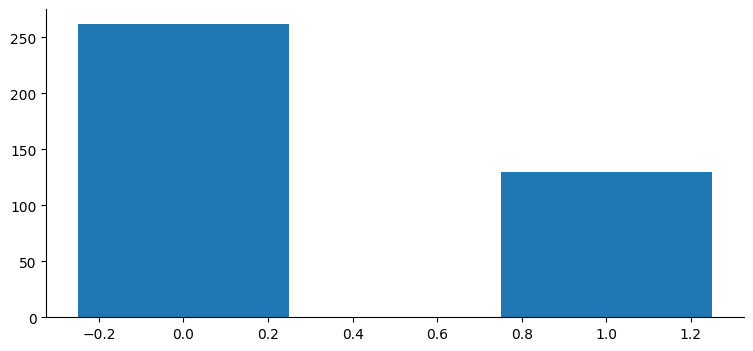

In [41]:
# Convert integer column to categorical
categories = rawdata.diabetes.astype('category').value_counts().index
counts = pd.Categorical(rawdata.diabetes).value_counts().values
plt.bar(categories, counts, width=0.5)

## Partition into train and test sets

In [42]:
train, test = train_test_split(rawdata.to_numpy(), shuffle=True)

## Scale X and encode y

In [43]:
# Extract X and y
train_X, train_y = train[:, :-1], train[:, -1].reshape(-1, 1)
test_X, test_y = test[:, :-1], test[:, -1].reshape(-1, 1)

# Fit a scaler on the training set
scaler_X = MinMaxScaler()
train_scaled_X = scaler_X.fit_transform(train_X)
# Apply the same scalers with learned parameters from training set on test set
test_scaled_X = scaler_X.transform(test_X)

# There's no special encoding necessary for y (= diabetes) because of already 0/1 pair values
labels = rawdata.diabetes.astype('category').cat.categories.values
print(f"The order of the labels: {labels}")

The order of the labels: [0 1]


## Neural Network Model
### Extract X and y

In [44]:
def nunits(a):
    """Number of units (features or outcomes)

    Arguments
    ---------
    a : array-like
        A ndarray.

    Returns
    -------
        Number of units : int

    """
    if len(a.shape) == 1:
        a = a.reshape(-1, 1)
    return a.shape[-1]

num_X = nunits(train_scaled_X)
num_y = nunits(train_y)
print("Number of features: {0} and number of outcomes: {1}".format(num_X, num_y))

Number of features: 8 and number of outcomes: 1


### Model

In [45]:
def baseline_model():
    # Input layer
    input = Input(shape=(num_X,))
    # Hidden layers
    hidden = Dense(units=128, activation='relu')(input)
    hidden = Dense(units=64, activation='relu')(hidden)
    hidden = Dense(units=32, activation='relu')(hidden)
    hidden = Dense(units=16, activation='relu')(hidden)
    # Output layer
    output = Dense(units=num_y, activation='sigmoid')(hidden)
    # Entire model
    model = Model(inputs=input, outputs=output, name='Classification')

    # Configuration of the training process
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [50]:
# Fit model
model = baseline_model()

epochs = 50
batch_size = 1
history = model.fit(x=train_scaled_X, y=train_y, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/50
294/294 [==============================] - 1s 1ms/step - loss: 0.6661 - accuracy: 0.6224
Epoch 2/50
294/294 [==============================] - 0s 1ms/step - loss: 0.6036 - accuracy: 0.6395
Epoch 3/50
294/294 [==============================] - 0s 1ms/step - loss: 0.5357 - accuracy: 0.7041
Epoch 4/50
294/294 [==============================] - 0s 1ms/step - loss: 0.5108 - accuracy: 0.7381
Epoch 5/50
294/294 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.7687
Epoch 6/50
294/294 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.7619
Epoch 7/50
294/294 [==============================] - 0s 1ms/step - loss: 0.4669 - accuracy: 0.7585
Epoch 8/50
294/294 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.7687
Epoch 9/50
294/294 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.7619
Epoch 10/50
294/294 [==============================] - 0s 1ms/step - loss: 0.4655 - accuracy: 0.7619

## Evaluation and Visualization of the classification model

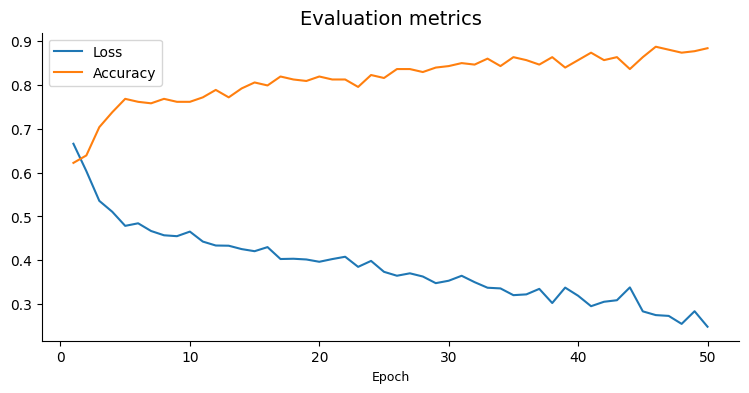

In [51]:
rcParams['figure.figsize'] = (9, 4)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, epochs+1), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, epochs+1), 
    history.history['accuracy'], label='Accuracy'
)
plt.title('Evaluation metrics', size=14)
plt.xlabel('Epoch', size=9)
plt.legend()

## Predictions

In [62]:
# In-sample predictions
train_yhat = model.predict(train_scaled_X)
train_yhat = np.where(train_yhat >= 0.5, 1, 0)

# Accuracy
print(f'Accuracy score: {round(accuracy_score(train_y, train_yhat), 2)*100}%')

10/10 [==============================] - 0s 2ms/step
Accuracy score: 90.0%
